## Data formatting

In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

%matplotlib nbagg

# Set the path to the foldercontaining text files
folder_path = "C:\\Users\\w16025698\\OneDrive - Northumbria University - Production Azure AD\\PhD\\Characterisation\\TGA\\DSC Results May 2022 CZTS"
file_name = "CZTS Hex and Toll Both Data OSH 09 06 2022.xlsx"
file_title = file_name.replace('.xlsx','')


df = pd.read_excel(os.path.join(folder_path, file_name), sheet_name='Sheet1', skiprows=1)
df['CZTS Hex Weight (%)'] = df['CZTS Hex Weight (mg)']/df['CZTS Hex Weight (mg)'].max() *100
df['CZTS Tol Weight (%)'] = df['CZTS Toll Weight (mg)']/df['CZTS Toll Weight (mg)'].max() *100
df['CZTS Hex Heat Flow weight corrected (W/g)'] = df['CZTS Hex Heat Flow (mW)'] / df['CZTS Hex Weight (mg)']

max_temp_index = df['CZTS Hex Temperature (°C)'].idxmax() # max hex temp index
df_slice = df.iloc[:max_temp_index + 1] # slice df to max index

display(df)


,CZTS Hex Time (min),CZTS Hex Temperature (°C),CZTS Hex Weight (mg),CZTS Hex Heat Flow (mW),CZTS Hex Temperature Difference (°C),CZTS Toll Time (min),CZTS Toll Temperature (°C),CZTS Toll Weight (mg),CZTS Toll Heat Flow (mW),CZTS Toll Temperature Difference (°C),CZTS Hex Weight (%),CZTS Tol Weight (%),CZTS Hex Heat Flow weight corrected (W/g)
0,0.000667,16.30005,8.825884,-10.94480,-1.157295,0.000867,17.00362,11.471140,-10.743020,-1.129426,99.996295,100.000000,-1.240080
1,0.008500,16.30179,8.826166,-10.96178,-1.159382,0.008500,17.00310,11.471010,-10.758690,-1.131295,99.999490,99.998867,-1.241964
2,0.021000,16.29526,8.826211,-10.96244,-1.159446,0.021000,16.99956,11.470520,-10.759200,-1.131357,100.000000,99.994595,-1.242032
3,0.029333,16.29624,8.826172,-10.96353,-1.159567,0.029333,16.99575,11.470440,-10.760000,-1.131456,99.999558,99.993898,-1.242161
4,0.037667,16.30000,8.826049,-10.96465,-1.159690,0.037667,16.99659,11.470040,-10.761350,-1.131618,99.998165,99.990411,-1.242306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18993,NaN,NaN,NaN,NaN,NaN,193.287700,116.94040,4.204560,-5.405840,-0.408222,NaN,36.653375,NaN
18994,NaN,NaN,NaN,NaN,NaN,193.300200,116.88660,4.204542,-5.408145,-0.408530,NaN,36.653218,NaN
18995,NaN,NaN,NaN,NaN,NaN,193.312700,116.83240,4.204554,-5.410699,-0.408869,NaN,36.653323,NaN
18996,NaN,NaN,NaN,NaN,NaN,193.321000,116.79730,4.204559,-5.412293,-0.409082,NaN,36.653367,NaN


## Plotting

* Add unified legend

<IPython.core.display.Javascript object>


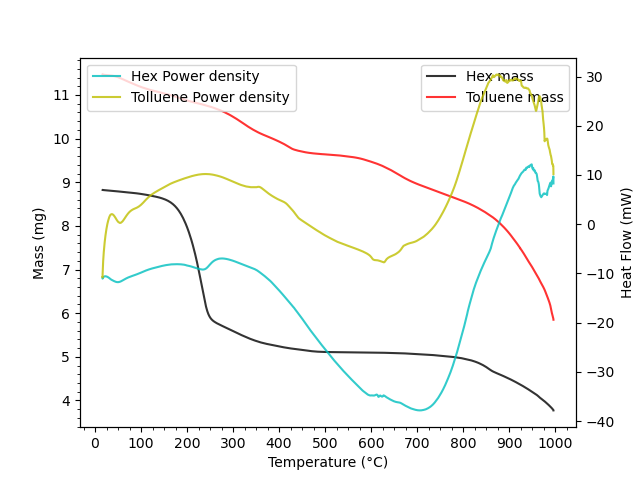

In [31]:
# Plot the JV curve and the power curve on the same plot
fig, ax1 = plt.subplots()

# Plot the JV curve on the left axis
ax1.set_xlabel("Temperature (°C)")
ax1.set_ylabel("Mass (mg)")
# ax1.scatter(df_slice['CZTS Hex Temperature (°C)'], df_slice['CZTS Hex Weight (mg)'], c='k', alpha=0.8, marker='o', s=5, label= 'Hex mass')
# ax1.scatter(df_slice['CZTS Hex Temperature (°C)'], df_slice['CZTS Toll Weight (mg)'], c='r', alpha=0.8, marker='o', s=5, label= 'Tolluene mass')
ax1.plot(df_slice['CZTS Hex Temperature (°C)'], df_slice['CZTS Hex Weight (mg)'], c='k', alpha=0.8, label= 'Hex mass')
ax1.plot(df_slice['CZTS Hex Temperature (°C)'], df_slice['CZTS Toll Weight (mg)'], c='r', alpha=0.8, label= 'Tolluene mass')
ax1.tick_params(axis='y', labelcolor='k')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(25))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.2))

ax2 = ax1.twinx()
ax2.set_ylabel('Heat Flow (mW)')
# ax2.scatter(df_slice['CZTS Hex Temperature (°C)'], df_slice['CZTS Hex Heat Flow (mW)'], c='c', alpha=0.8, marker='x', s=5, label= 'Hex Power density')
# ax2.scatter(df_slice['CZTS Hex Temperature (°C)'], df_slice['CZTS Toll Heat Flow (mW)'], c='y', alpha=0.8, marker='o', s=5, label= 'Tolluene Power density')
ax2.plot(df_slice['CZTS Hex Temperature (°C)'], df_slice['CZTS Hex Heat Flow (mW)'], c='c', alpha=0.8, label= 'Hex Power density')
ax2.plot(df_slice['CZTS Hex Temperature (°C)'], df_slice['CZTS Toll Heat Flow (mW)'], c='y', alpha=0.8, label= 'Tolluene Power density')

ax1.legend()
ax2.legend()
# ax1.grid()

plt.show()

<IPython.core.display.Javascript object>


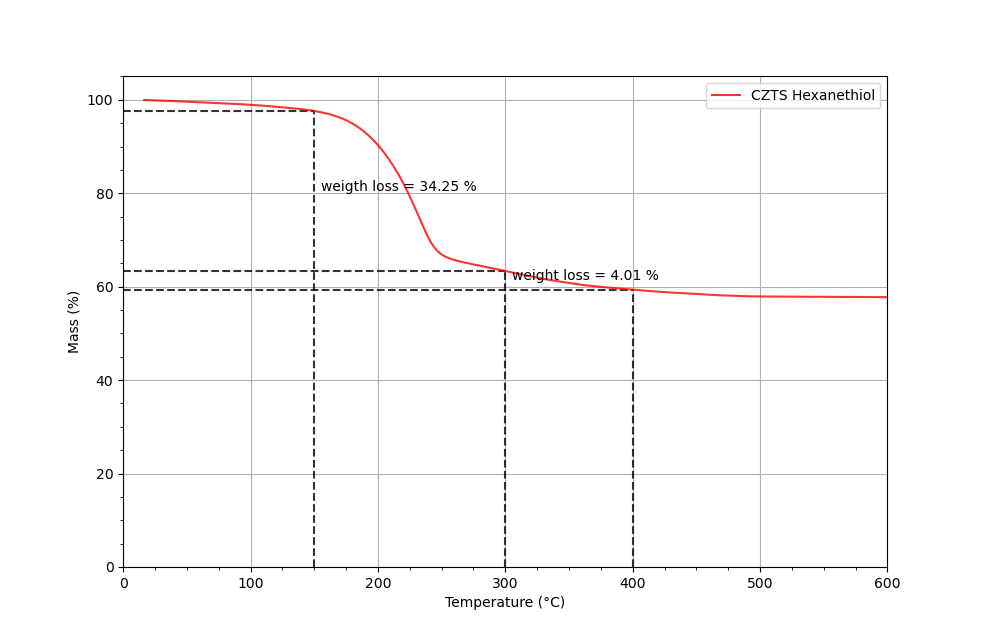

In [61]:
# Plot the JV curve and the power curve on the same plot
fig, ax1 = plt.subplots()

# Plot the JV curve on the left axis
ax1.set_xlabel("Temperature (°C)")
ax1.set_ylabel("Mass (%)")
ax1.plot(df_slice['CZTS Hex Temperature (°C)'], df_slice['CZTS Hex Weight (%)'], c='r', alpha=0.8, label= 'CZTS Hexanethiol')
ax1.tick_params(axis='y', labelcolor='k')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(25))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.set_xlim(0,600)
ax1.set_ylim(0,105)

czts_hex_weight_at_150 = df_slice.loc[(df_slice['CZTS Hex Temperature (°C)']  - 150).abs().idxmin(), 'CZTS Hex Weight (%)']
czts_hex_weight_at_300 = df_slice.loc[(df_slice['CZTS Hex Temperature (°C)']  - 300).abs().idxmin(), 'CZTS Hex Weight (%)']
czts_hex_weight_at_400 = df_slice.loc[(df_slice['CZTS Hex Temperature (°C)']  - 400).abs().idxmin(), 'CZTS Hex Weight (%)']

first_step = czts_hex_weight_at_150 - czts_hex_weight_at_300
second_step = czts_hex_weight_at_300 - czts_hex_weight_at_400

ax1.vlines(150, 0, czts_hex_weight_at_150, colors='k', linestyles='--', alpha=0.8)
ax1.vlines(300, 0, czts_hex_weight_at_300, colors='k', linestyles='--', alpha=0.8)
ax1.vlines(400, 0, czts_hex_weight_at_400, colors='k', linestyles='--', alpha=0.8)
ax1.hlines(czts_hex_weight_at_150, 0, 150, colors='k', linestyles='--', alpha=0.8)
ax1.hlines(czts_hex_weight_at_300, 0, 300, colors='k', linestyles='--', alpha=0.8)
ax1.hlines(czts_hex_weight_at_400, 0, 400, colors='k', linestyles='--', alpha=0.8)
ax1.text(155, czts_hex_weight_at_150 - first_step/2, "weigth loss = {:.2f} %".format(first_step), fontsize=10)
ax1.text(305, czts_hex_weight_at_300 - second_step/2, "weight loss = {:.2f} %".format(second_step), fontsize=10)

ax1.grid()
ax1.legend()

save_dir = os.path.join('C:\\Users\\w16025698\\OneDrive - Northumbria University - Production Azure AD\\PhD\\Characterisation\\TGA', 'TGA Plots')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the plot as an image file
plt.savefig(os.path.join(save_dir, file_title + '.png'), dpi=500)